In [1]:
# import numpy as np
# np.set_printoptions(precision=3) # only 3 decimals in print
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

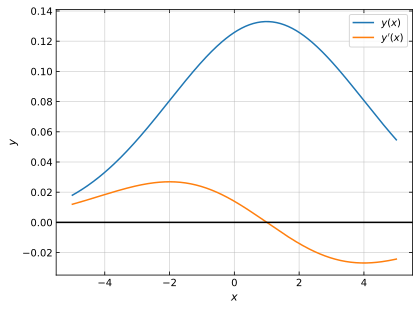

In [2]:
# Plot a Gaussian and its derivative found with autodifferentiation.
mu = 1
sigma = 3
xs = torch.linspace(-5, 5, 250, requires_grad=True)
ys = torch.exp(-0.5 * (xs - mu)**2 / sigma**2) / (sigma * (2 * torch.pi)**0.5)
dydxs = torch.autograd.grad(ys, xs, torch.ones_like(ys), create_graph=True)[0]

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
ax.grid(alpha=0.5)
with torch.no_grad():
    ax.plot(xs, ys, label=r'$y(x)$')
    ax.plot(xs, dydxs, label=r"$y'(x)$")
ax.axhline(0, c='k')
ax.legend()

fig.savefig('ex42_fig1.png')

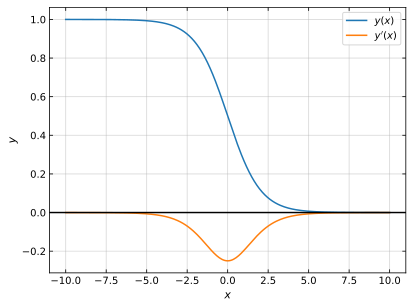

In [3]:
# Plot a Fermi function and its derivative found with autodifferentiation.
xs = torch.linspace(-10, 10, 250, requires_grad=True)
ys = (torch.exp(xs) + 1)**-1
dydxs = torch.autograd.grad(ys, xs, torch.ones_like(ys), create_graph=True)[0]

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
ax.grid(alpha=0.5)
with torch.no_grad():
    ax.plot(xs, ys, label=r'$y(x)$')
    ax.plot(xs, dydxs, label=r"$y'(x)$")
ax.axhline(0, c='k')
ax.legend()

fig.savefig('ex42_fig2.png')

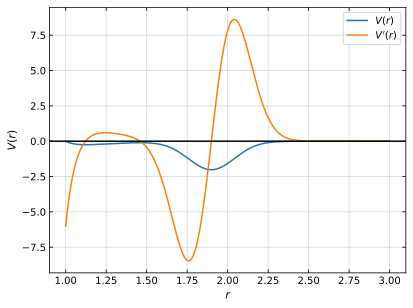

In [4]:
# Complete this class implementing the Lennard-Jones-Gauss potential for distances r
class LennardJonesGauss:
    def __init__(self, eps=1, sigma_squared=0.02, r0=1.7):
        self.eps = torch.nn.Parameter(torch.tensor(float(eps)))
        self.sigma_squared = torch.nn.Parameter(torch.tensor(float(sigma_squared)))
        self.r0 = torch.nn.Parameter(torch.tensor(float(r0)))
        
    def V(self, r):
        # return YOUR CODE HERE
        return r**-12 - r**-6 - self.eps*torch.exp(-(r-self.r0)**2/(2*self.sigma_squared))

calc = LennardJonesGauss(eps=2, r0=1.9)
rs = torch.linspace(1, 3, 250, requires_grad=True)
Vs = calc.V(rs)
dVdrs = torch.autograd.grad(Vs, rs, torch.ones_like(Vs), create_graph=True)[0]

fig, ax = plt.subplots()
ax.set(xlabel=r'$r$', ylabel=r'$V(r)$')
ax.grid(alpha=0.5)
with torch.no_grad():
    ax.plot(rs, Vs, label=r'$V(r)$')
    ax.plot(rs, dVdrs, label=r"$V'(r)$")
ax.axhline(0, c='k')
ax.legend()

fig.savefig('ex42_fig3.png')